# 3.3 MOO for 2D vector fields

In [1]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

/home/dharrington/cyclops/src


In [2]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'disp_line_field.obj')
grid = pickle_manager.read_file('simulation', 'disp_line_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1], [-1]])*0.002

In [3]:
# Setup the sensor suite
def f(x): return np.zeros(x.shape)
sensor = RoundSensor(0, f, 0.1, np.array([[-5e10, -5e10, -5e10], [5e10, 5e10, 5e10]]), 0.001, 1)
sensors = np.array([sensor]*5)

sensor_suite = SensorSuite(
    VectorField(RBFModel, field_bounds), 
    sensors
)

In [4]:
# Setup the experiment
optimiser = NSGA2Optimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_moo(
    sensor_suite,
    sensor_bounds,
    repetitions=10,
    loss_limit=100
)
res = experiment.design()

# Display and save the results
for i, setup in enumerate(res.X):
    pickle_manager.save_file('results', 'Temp_1D_'+str(i)+'.obj', setup.reshape(-1, true_temp_field.get_dim()))

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       40 |      1 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |             f
     3 |       60 |      1 |  6.970567E-13 |             f
     4 |       70 |      1 |  6.970567E-13 |             f
     5 |       80 |      1 |  6.970567E-13 |             f
     6 |       90 |      1 |  2.764970E-12 |             f
     7 |      100 |      1 |  2.764970E-12 |             f
     8 |      110 |      1 |  2.764970E-12 |             f
     9 |      120 |      1 |  2.764970E-12 |             f
    10 |      130 |      1 |  2.764970E-12 |             f
    11 |      140 |      1 |  3.223241E-12 |             f
    12 |      150 |      1 |  3.223241E-12 |             f
    13 |      160 |      1 |  3.223241E-12 |             f
    14 |      170 |      1 |  3.223241E-12 |             f
    15 |      180 |      1 |  3.223241E-12 |             f
    16 |      190 |      1 |  3.533131E-12 |            

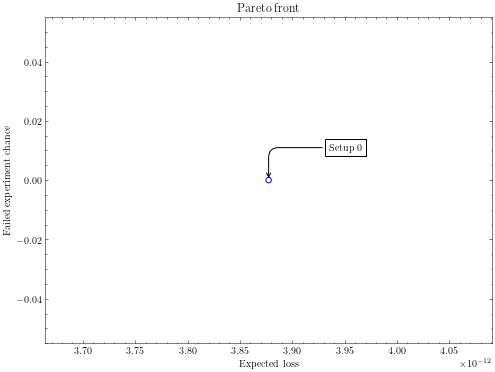


Loss: [3.8773880458802706e-12, 0.0]


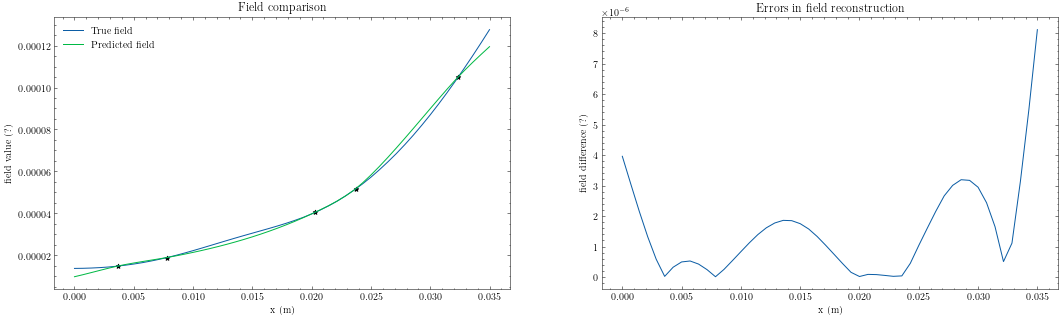


Loss: [3.8773880458802706e-12, 0.0]


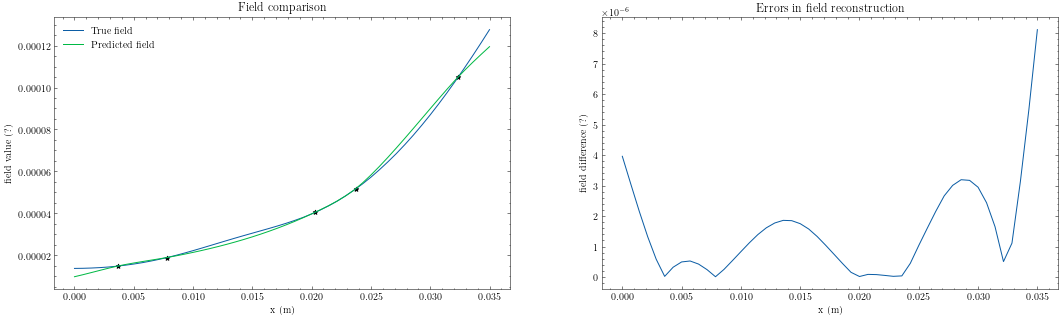

In [5]:
graph_manager.build_pareto(res.F)
graph_manager.draw()

graph_manager.build_pareto(res.F)
graph_manager.save_png('results', 'Pareto.png')

display_str = input('Enter setup to display [Q to quit]: ')
while display_str.isnumeric():
    proposed_layout, true_disps, model_disps, sensor_vals = experiment.get_SOO_plotting_arrays(res.X[int(display_str)])
    print('\nLoss:', experiment.calc_MOO_loss(res.X[int(display_str)]))
    mag_true_disps = np.linalg.norm(true_disps, axis=1).reshape(-1, 1)
    mag_model_disps = np.linalg.norm(model_disps, axis=1).reshape(-1, 1)
    mag_sensor_vals = np.linalg.norm(sensor_vals, axis=1).reshape(-1, 1)
    
    graph_manager.build_1D_compare(
        grid,
        proposed_layout,
        mag_sensor_vals,
        mag_true_disps,
        mag_model_disps
    )
    graph_manager.draw()
    display_str = input('Enter setup to display [Q to quit]: ')